# Student Data
This  notebook analyizes pass/fail data for a class

In [1]:
#data oluşturduk

data = [50,50,47,97,49,3,53,42,26,74,82,62,37,15,70,27,36,35,48,52,63,64]

print(data)

[50, 50, 47, 97, 49, 3, 53, 42, 26, 74, 82, 62, 37, 15, 70, 27, 36, 35, 48, 52, 63, 64]


In [2]:
import numpy as np

#datamızı değişken tanımlayıp array'a çevirdik, önce numpy tanımladık

grades = np.array(data)

print(grades)

[50 50 47 97 49  3 53 42 26 74 82 62 37 15 70 27 36 35 48 52 63 64]


In [3]:
#eleman sayısını öğrendik. ',' den sonrası boş olsada 1 adet arrey olduğunu gösteriyor.

grades.shape

(22,)

In [4]:
#5. index'i çağırdık

grades[5]

3

In [5]:
#grades arrayinin ortalamasını aldık. Mean methodu ile

grades.mean()

49.18181818181818

In [6]:
#öğrencilerin çalışma saatlerini listeledik ve student data adında yeni bir değişkenin içine 2 adet arrey tanımladık.


study_hours = [10.0,11.5,9.0,16.0,9.25,1.0,11.5,9.0,8.5,14.5,15.5,13.75,9.0,8.0,15.5,8.0,9.0,6.0,10.0,12.0,12.5,12.0]

student_data = np.array([study_hours,grades])

In [7]:
#1. parantez hangi array'i çağırdığımızı gösteriyor.
#2. parantez ilk parantezde çağırdığımız arrayin içinden veri çağırmamızı sağlıyor

student_data[0][0]

10.0

In [8]:
#oluşturduğumuz arraylerin ortalamalarını alıyoruz ve print içinde yazan string ile yazdırıyoruz


avg_study = student_data[0].mean()
avg_grade = student_data[1].mean()

#backslash options + ?
#\n "carriage return" sonrasında yazılanı alt satıra geçirir
print(f"Average Study Time: {avg_study}\nAverage Grade: {avg_grade}")

Average Study Time: 10.522727272727273
Average Grade: 49.18181818181818


In [9]:
import pandas as pd

#df = data frames.
#Yeni bir data elde ettik ve df_students adında bir değişken oluşturup onun içine tanımladık 
#önceki arraylerimizide ekledik ve pandas kullanarak data frame oluşturduk

df_students = pd.DataFrame({"Name": ['Dan', 'Joann', 'Pedro', 'Rosie', 'Ethan', 'Vicky', 'Frederic', 'Jimmie', 
                                     'Rhonda', 'Giovanni', 'Francesca', 'Rajab', 'Naiyana', 'Kian', 'Jenny', 
                                     'Jakeem', 'Helena', 'Ismat', 'Anila', 'Skye', 'Daniel', 'Aisha'],
                             'StudyHours' :student_data[0],
                             'Grade' :student_data[1]})

df_students

,Name,StudyHours,Grade
0,Dan,10.00,50.0
1,Joann,11.50,50.0
2,Pedro,9.00,47.0
3,Rosie,16.00,97.0
4,Ethan,9.25,49.0
5,Vicky,1.00,3.0
6,Frederic,11.50,53.0
7,Jimmie,9.00,42.0
8,Rhonda,8.50,26.0
9,Giovanni,14.50,74.0


In [10]:
#df_students.loc[5]
#df_studets.loc[5, 'Grade']
#df_studets.loc[df_students["Name"] == "Vicky"]
#df_students.query("Name=='Vicky'")
#YUKARIDAKİLER FARKLI YÖNTEMLER

df_students[df_students.Name=="Vicky"]

,Name,StudyHours,Grade
5,Vicky,1.0,3.0


In [11]:
#to find any missing values

df_students.isnull().sum()

Name          0
StudyHours    0
Grade         0
dtype: int64

In [12]:
#eksik bir değer var ise ortalamaya göre otomatik dolduruyor.

df_students.StudyHours = df_students.StudyHours.fillna(df_students.StudyHours.mean())

In [13]:
#axis=0 for rows. 
#axis=1 for columns.
#dropna() metodu, eksik veri (NaN) içeren tüm satırları siler.

df_students = df_students.dropna(axis=0)

In [14]:
# get the mean study hours using to column name as an index
mean_study = df_students['StudyHours'].mean()

#get the mean grade using the column name as a property (just to make the point)
mean_grade = df_students.Grade.mean()

#Print the mean study hours and mean grade
print("Average weekly study hours: {:.2f}\nAverage grade: {:.2f}".format(mean_study, mean_grade))

Average weekly study hours: 10.52
Average grade: 49.18


In [15]:
#ortalama haftalık çalışma saatinden fazla çalışanların aldıklarını notların ortalamasını aldık.

df_students[df_students.StudyHours > mean_study].Grade.mean()

66.7

In [16]:
import pandas as pd

passed = pd.Series(df_students.Grade >= 60)

df_students = pd.concat([df_students, passed.rename('Passed_Students')], axis=1)

# Drop duplicate rows across all columns
#df_students = df_students.drop_duplicates()

In [17]:
df_students.groupby(df_students.Passed_Students).Name.count()

Passed_Students
False    15
True      7
Name: Name, dtype: int64

In [18]:
print(df_students.groupby(df_students.Passed_Students).Grade.mean())

Passed_Students
False    38.000000
True     73.142857
Name: Grade, dtype: float64


In [19]:
#veri değerlerini, study hours'a göre çoktan aza doğru sıralıyor

#df_students = df_students.sort_values('StudyHours', ascending=False)

In [ ]:
from matplotlib import pyplot as plt

#barchart
#figure içinde görünen chart değil tamamını kapsar. boyutlandırması inch ile olur ama pixel olarak hesaplarsak 100* yaparız yani 1280x720 bir ekran için 12.8 7.2 aldık.
#figure'ün içinde birden çok chart olabilir 


fig = plt.figure(figsize=(10, 4))

plt.bar(x=df_students.Name, height=df_students.Grade)

plt.title("Student Grades")
plt.xlabel("Name")
plt.ylabel("Grades")
plt.xticks(rotation=90)

plt.show()

/var/folders/p5/w9m_6hv9315307qs1vcmwc8r0000gn/T/ipykernel_63535/2497603176.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(df_students.Name, rotation=90)
/var/folders/p5/w9m_6hv9315307qs1vcmwc8r0000gn/T/ipykernel_63535/2497603176.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


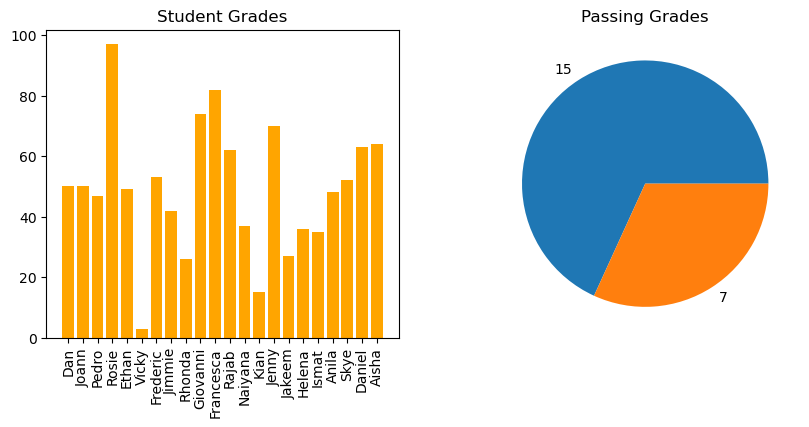

In [ ]:
#yukarıdaki işlemin aynısını yaptık ama bu sefer tek figure içinde 2 chart gösteriyoruz ax[0] 1. chart ax[1] 2. chartımız olucak

fig, ax = plt.subplots(1, 2, figsize=(10, 4))

ax[0].bar(x=df_students.Name, height=df_students.Grade, color="orange")

ax[0].set_title("Student Grades")
ax[0].set_xticklabels(df_students.Name, rotation=90)

#pie chart 

passes_count = df_students.Passed_Students.value_counts()
ax[1].pie(passes_count, labels=passes_count)
ax[1].set_title("Passing Grades")

fig.show()

<Axes: xlabel='Name'>

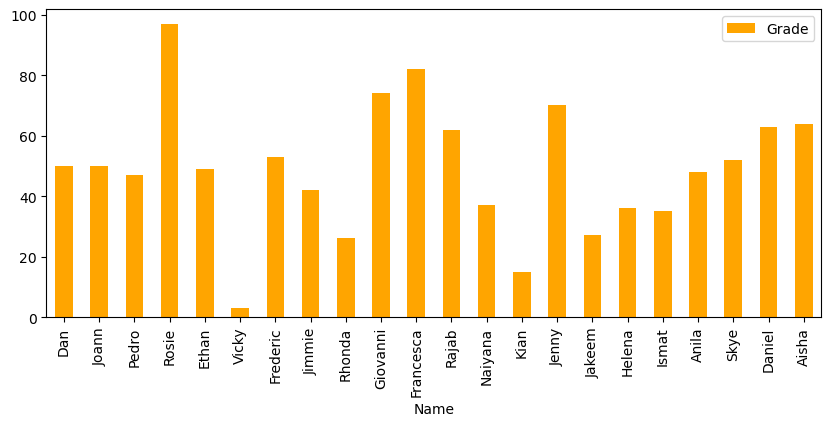

In [ ]:
#matplotlib olmadan dataframe üzerinden chart oluşturma

df_students.plot.bar(x="Name", y="Grade", figsize=(10, 4), color="orange")

Minimum: 3.0
Maximum: 97.0
Mean: 49.18181818181818
Median: 49.5
Mode 50.0


/var/folders/p5/w9m_6hv9315307qs1vcmwc8r0000gn/T/ipykernel_63535/2344163453.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


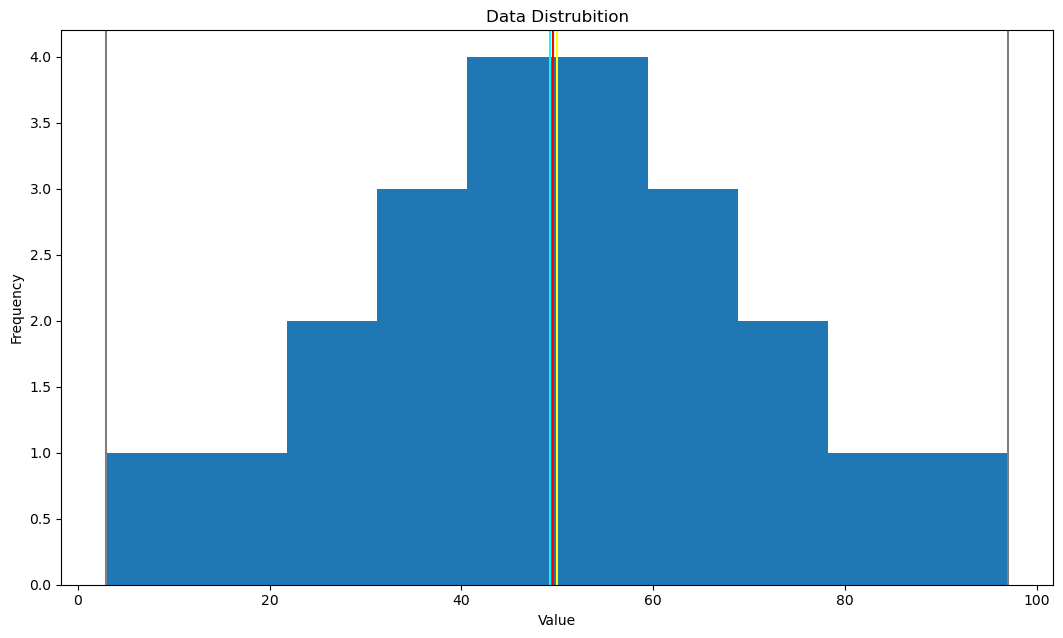

In [63]:
#histogram chart 

grades = df_students.Grade

#mean = average of all numbers in a sample
#median = the middle number of a sample
#mode = the number that occurs the most often in a sample
#mode is a list item

min_val = df_students.Grade.min()
max_val = df_students.Grade.max()
mean_val = df_students.Grade.mean()
med_val = df_students.Grade.median()
mod_val = df_students.Grade.mode()[0]

print(f"Minimum: {min_val}\nMaximum: {max_val}\nMean: {mean_val}\nMedian: {med_val}\nMode {mod_val}")

fig = plt.figure(figsize=(12.8,7.2))

plt.hist(grades)

plt.axvline(x=min_val, color="gray")
plt.axvline(x=max_val, color="gray")
plt.axvline(x=mean_val, color="cyan")
plt.axvline(x=med_val, color="red")
plt.axvline(x=mod_val, color="yellow")

plt.title("Data Distrubition")
plt.xlabel("Value")
plt.ylabel("Frequency")

fig.show()


/var/folders/p5/w9m_6hv9315307qs1vcmwc8r0000gn/T/ipykernel_63535/1155291094.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


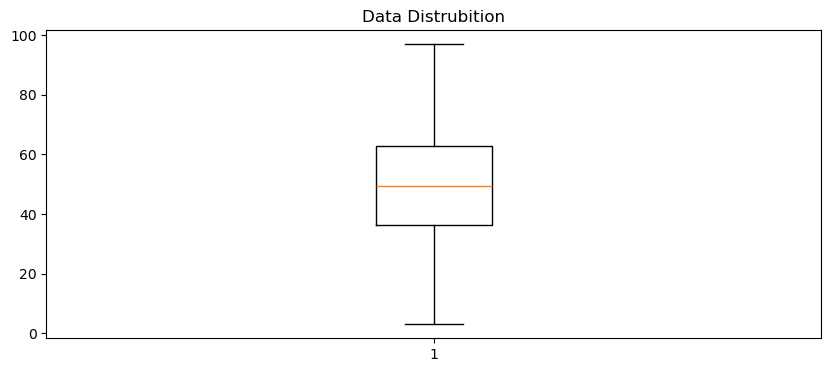

In [57]:
#boxplot = box chart

grades = df_students.Grade

fig = plt.figure(figsize=(10, 4))

plt.boxplot(grades)
plt.title("Data Distrubition")

fig.show()

Minimum:{:.2f}
Mean:{:.2f}
Median:{:.2f}
Mode:{:.2f}
Maximum{:.2f}


/var/folders/p5/w9m_6hv9315307qs1vcmwc8r0000gn/T/ipykernel_63535/3748086987.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


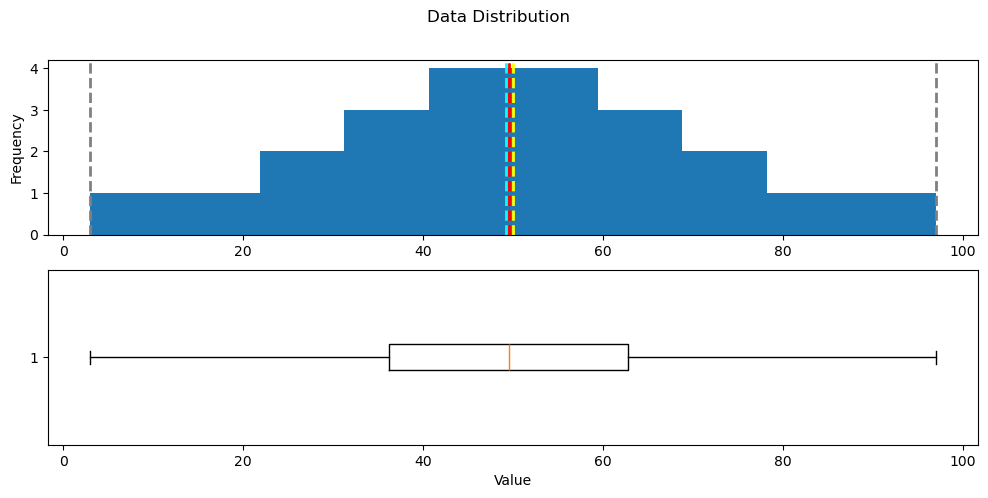

In [79]:
#create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt
    import statistics

    #get Statistic
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = statistics.mode(var_data)  # Daha güvenli mod hesaplama

    print("Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum{:.2f}")
    
    # Create figure and subplots
    fig, ax = plt.subplots(2, 1, figsize=(12, 5))  # 1 satır, 2 sütun şeklinde figür ve eksen oluştur

    #plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel("Frequency")    

    #add lines for the mean, median and mode
    ax[0].axvline(x=min_val, color="gray", linestyle="dashed", linewidth=2)
    ax[0].axvline(x=mean_val, color="cyan", linestyle="dashed", linewidth=2)
    ax[0].axvline(x=med_val, color="red", linestyle="dashed", linewidth=2)
    ax[0].axvline(x=mod_val, color="yellow", linestyle="dashed", linewidth=2)
    ax[0].axvline(x=max_val, color="gray", linestyle="dashed", linewidth=2)

    #plot the boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel("Value")

    #add a tittle to the Figure
    fig.suptitle('Data Distribution')

    #show the figure
    fig.show()

#get the variable to examine
col = df_students['Grade']
#call the function
show_distribution(col)

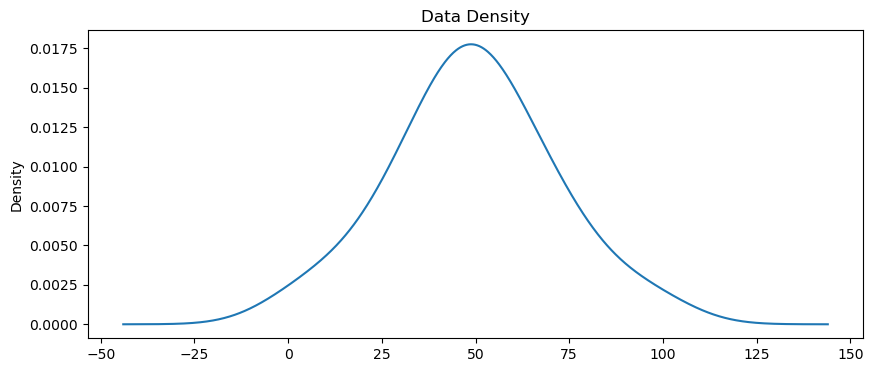

In [82]:
def show_density(data):
    fig = plt.figure(figsize=(10,4))

    data.plot.density()

    plt.title('Data Density')

    plt.show()

show_density(df_students.Grade)    

Minimum:{:.2f}
Mean:{:.2f}
Median:{:.2f}
Mode:{:.2f}
Maximum{:.2f}


/var/folders/p5/w9m_6hv9315307qs1vcmwc8r0000gn/T/ipykernel_63535/3748086987.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


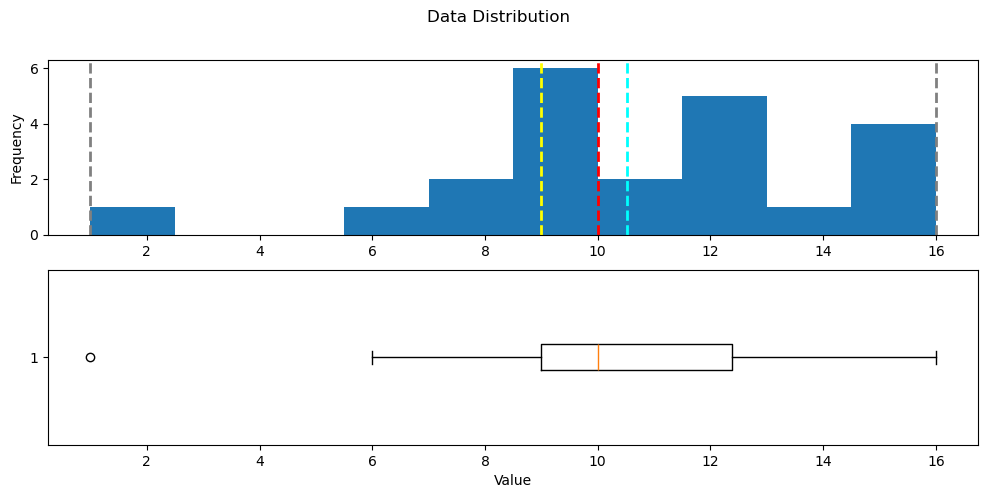

In [83]:
show_distribution(df_students.StudyHours)

Minimum:{:.2f}
Mean:{:.2f}
Median:{:.2f}
Mode:{:.2f}
Maximum{:.2f}


/var/folders/p5/w9m_6hv9315307qs1vcmwc8r0000gn/T/ipykernel_63535/3748086987.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


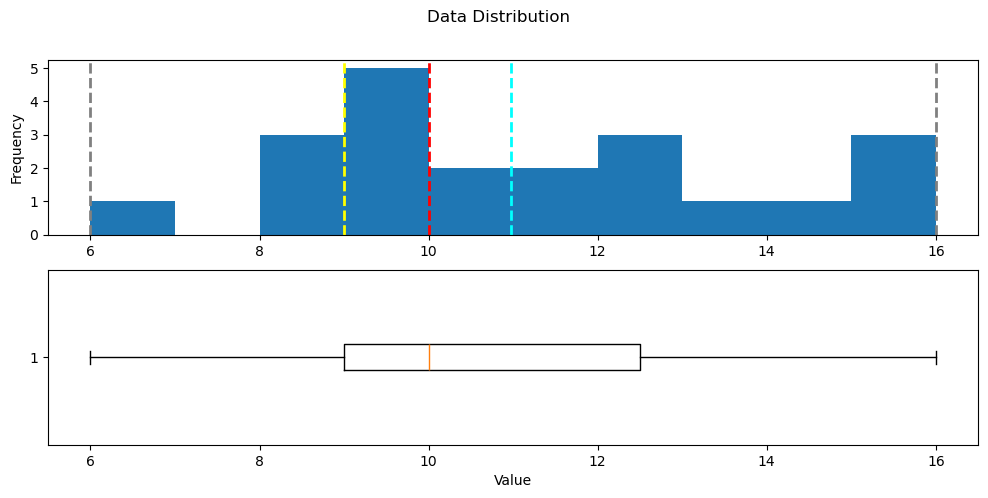

In [84]:
col = df_students[df_students.StudyHours>1]['StudyHours']
show_distribution(col)

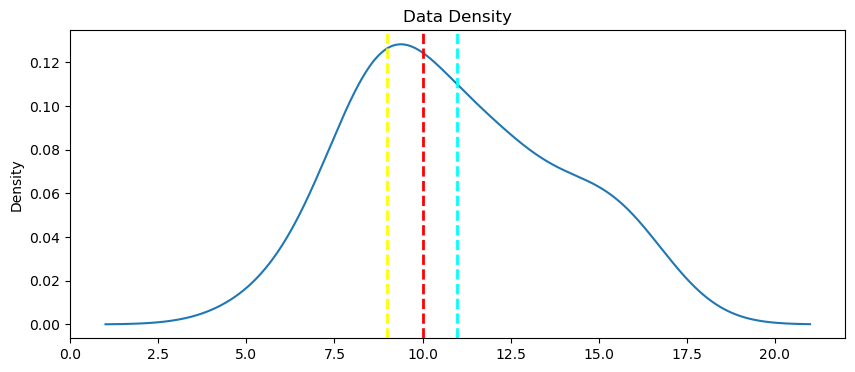

In [87]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    #plot density
    var_data.plot.density()

    #add titles and labels
    plt.title('Data Density')

    #show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    #show the figure
    plt.show()

#get the density of StudyHours
show_density(col)    

In [ ]:

import math

mean = df_students.StudyHours.mean()
variance = 0

for hours in df_students.StudyHours:
   variance = variance + ((mean - hours)**2)

variance = variance/df_students.shape[0]

variance

std = math.sqrt(variance)

std

#%68 unutma!!!!!!!

3.4069690366260925

In [ ]:
for col_name in ['Grade', 'StudyHours']:
    col = df_students[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print(f'\n{col_name}:\n - Range: {rng}\n - Variance: {var}\n - Std.Dev: {std}')


In [91]:
print(f'68% of grades will fall between {df_students.Grade.mean() - df_students.Grade.std()} and {df_students.Grade.mean() + df_students.Grade.std()}')

68% of grades will fall between 27.4439066782538 and 70.91972968538256


In [92]:
df_students.describe()

,StudyHours,Grade
count,22.000000,22.000000
mean,10.522727,49.181818
std,3.487144,21.737912
min,1.000000,3.000000
25%,9.000000,36.250000
50%,10.000000,49.500000
75%,12.375000,62.750000
max,16.000000,97.000000


In [93]:
df_sample = df_students[df_students.StudyHours>1]
df_sample

,Name,StudyHours,Grade,Passed_Students
0,Dan,10.00,50.0,False
1,Joann,11.50,50.0,False
2,Pedro,9.00,47.0,False
3,Rosie,16.00,97.0,True
4,Ethan,9.25,49.0,False
6,Frederic,11.50,53.0,False
7,Jimmie,9.00,42.0,False
8,Rhonda,8.50,26.0,False
9,Giovanni,14.50,74.0,True
10,Francesca,15.50,82.0,True


<Axes: title={'center': 'StudyHours'}, xlabel='Passed_Students'>

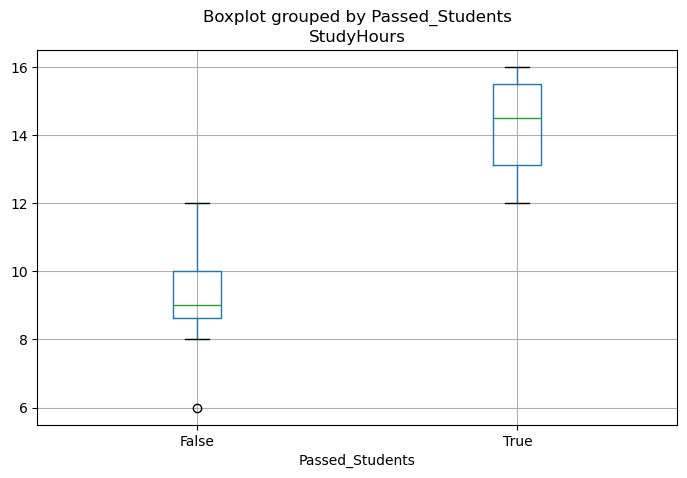

In [95]:
df_sample.boxplot(column='StudyHours', by='Passed_Students', figsize=(8,5))

<Axes: xlabel='Name'>

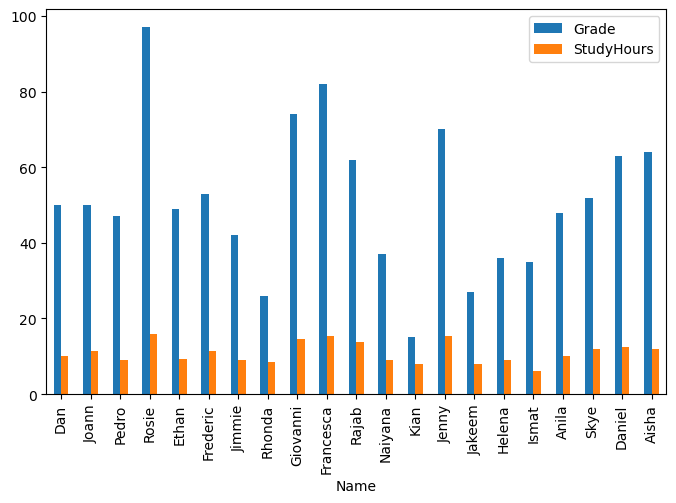

In [96]:
df_sample.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8,5))

<Axes: xlabel='Name'>

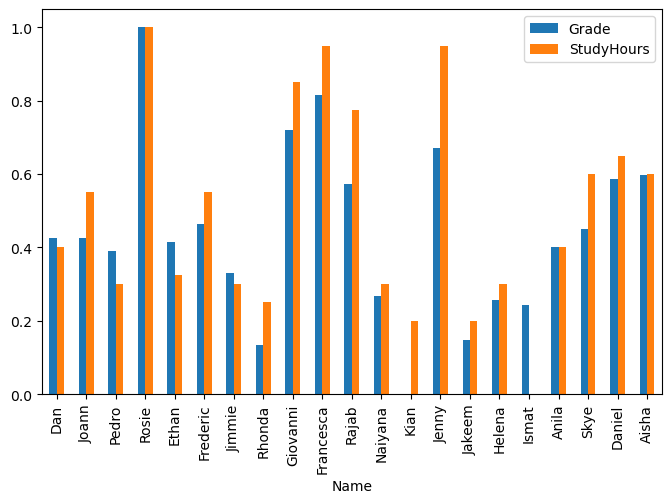

In [97]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_normalized = df_sample[['Name', 'Grade', 'StudyHours']].copy()

df_normalized[['Grade', 'StudyHours']] = scaler.fit_transform(df_normalized[['Grade', 'StudyHours']])

df_normalized.plot(x='Name', y=['Grade', 'StudyHours'], kind='bar', figsize=(8,5))

In [98]:
df_normalized.Grade.corr(df_normalized.StudyHours)

0.9117666413789677

<Axes: title={'center': 'Study Time vs Grade'}, xlabel='StudyHours', ylabel='Grade'>

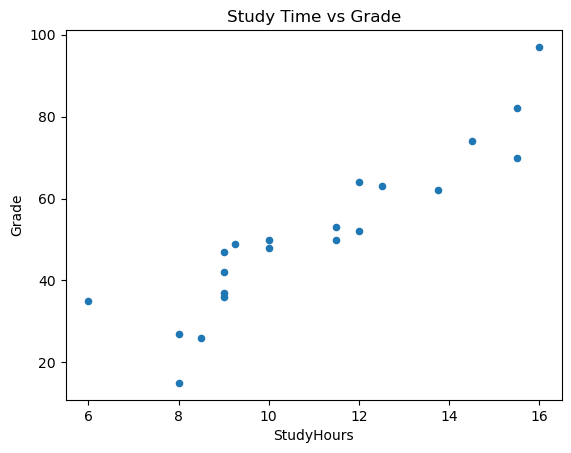

In [99]:
df_sample.plot.scatter(title='Study Time vs Grade', x='StudyHours', y='Grade')

In [ ]:
y = mx + b

f(x)

error = y - f(x) ** 2



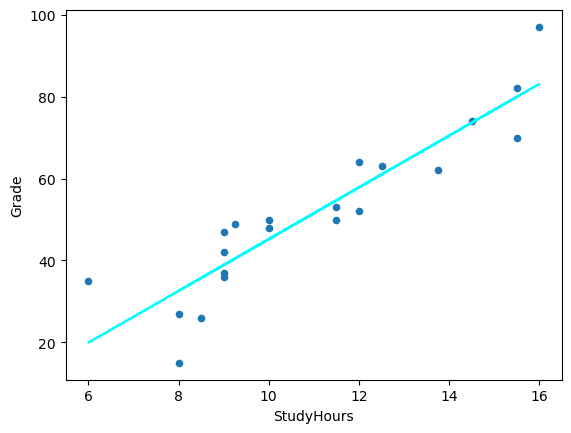

6.31342563379236 -17.91640993281615


In [101]:
from scipy import stats

df_regression = df_sample[['Grade', 'StudyHours']].copy()

m, b, r, p, se = stats.linregress(df_regression['StudyHours'], df_regression['Grade'])

df_regression['fx'] = (m * df_regression['StudyHours']) + b

df_regression['error'] = df_regression['fx'] - df_regression['Grade']

df_regression.plot.scatter(x='StudyHours', y='Grade')

plt.plot(df_regression['StudyHours'], df_regression['fx'], color='cyan')

plt.show()

print(m,b)

In [106]:
def predict(x):
    m = 6.3134
    b = -17.9164
    return m*x + b

prediction = predict(14)

prediction


70.4712